# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

https://github.com/Bellswols/Data_summative.git
  



3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**


RQ: Are earthquakes stronger in certain months of the year?



1. Load `attendance_anonymised.csv` using `pandas`.



# Attendance Analysis Notebook

In this notebook, I explore an anonymised attendance dataset. I start by loading and inspecting the data, I then clean it and perform a range of methods to answer the questions about attendance patterns, including:

- How attendance varies over time for specific modules
- How student-level overall attendance relates to module-level attendance
- Whether students with low overall attendance tend to attend low-attendance modules 


In [1]:
# Import core libraries for data analysis and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import zscore
from scipy.stats import pearsonr


In [2]:
# Load the attendance data
df = pd.read_csv('attendance_anonymised-1.csv')

2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


## Initial data inspection

I first inspect the raw dataset using `head()`, `info()` and `describe()` to learn about:

- The number of rows and columns
- The data types of each column
- Basic summary statistics for numerical variables


In [3]:
# Let's look at the first few rows of the dataframe
df.head()


,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A


In [4]:
# Let's get info about the dataset (column types and non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

In [5]:
# Let's get summary statistics for numerical columns
df.describe()

,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,258.244473,1252.674016,2023.913212,495.752536,504.818742,572.408139,0.716531,0.732892
std,146.904888,530.609058,0.774686,292.031166,275.174454,313.946746,0.450695,0.442462
min,1.000000,4.000000,2023.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,146.000000,840.000000,2023.000000,223.000000,267.000000,297.000000,0.000000,0.000000
50%,265.000000,1306.000000,2024.000000,515.000000,504.000000,574.000000,1.000000,1.000000
75%,384.000000,1749.000000,2025.000000,788.000000,733.000000,839.000000,1.000000,1.000000
max,498.000000,1945.000000,2025.000000,984.000000,984.000000,1124.000000,1.000000,1.000000


3. Drop the `Planned End Date` column.


In [6]:
# Let's drop the planned end date column  
df1 = df.drop(columns=['Planned End Date'])
df1.head()


,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A


## Dropping unnecessary columns

The 'Planned End Date' column is not needed for the analysis, so I drop it and create a new DataFrame 'df1'.

4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [7]:
# Renaming the columns as requested, leaving out ones that stay the same and then saving it to a new dataframe (df2)
df2 = df1.rename(columns={'Unit Instance Code': 'Module Code',
                         'Calocc Code': 'Year',
                         'Long Description': 'Module Name',
                         'Register Event ID' : 'Event ID',
                         'Register Event Slot ID' : 'Event Slot ID',
                         'Planned Start Date': 'Date',
                         'is Positive' : 'Has Attended',
                         'Positive Marks' : 'Attended',
                         'Negative Marks' : 'NotAttended',
                         'Usage Code' : 'Attendance Code'
                         })

df2.head()

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Postive Marks,NotAttended,Attendance Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A


5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [8]:
# I will convert the 'Date' column to datetime format
df2['Date'] = pd.to_datetime(df2['Date'])
df2.head()



,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Postive Marks,NotAttended,Attendance Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A


## Converting dates

I converted the `Date` column to a pandas `datetime` type so that I can sort and group events by date reliably.


6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



In [9]:
# Saving preprocessed data to a new CSV file for future use (Shiny)
df2.to_csv("my_file.csv", index=False)


In [10]:
# I will now filter the data to only include the History module
df_history = df2[df2['Module Name'] == 'History'].copy()

# Cleaning the data in case there are any invalid (i.e. N/A) values
df_history = df_history[df_history['Has Attended'] != '~']

# And converting 'Has Attended' (Y/N) column into numerical values (1/0)
df_history['Numerical Attendance'] = df_history['Has Attended'].map({'Y': 1, 'N': 0})

# Let's check we now see only 0s and 1s
df_history['Numerical Attendance'].unique()





array([0, 1])

In [11]:
# Let's see the value counts for 'Has Attended' to confirm cleaning has worked
df_history['Has Attended'].astype('string').str.strip().str.upper().value_counts(dropna=False)


Has Attended
Y    332
N    261
Name: count, dtype: Int64

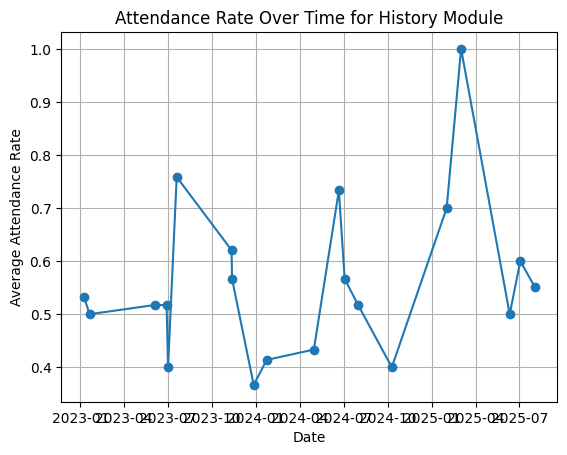

In [12]:
# Now I will calculate the average attendance rate for each date
attendance_rate = (
    df_history.groupby('Date', as_index=False)['Numerical Attendance']
    .mean() # Mean of 0/1 = proportion of students attending
    .sort_values('Date')
)


# I will plot the attendance rate over time for the History module

plt.plot(attendance_rate['Date'], attendance_rate['Numerical Attendance'], marker='o')
plt.title("Attendance Rate Over Time for History Module")
plt.xlabel("Date")
plt.ylabel("Average Attendance Rate")
plt.grid(True)
plt.show()


## Exercise 2 : Attendance over time for a specific module

For this step I focus on a single module, **History**, and examine how attendance changes over time.

1. I filter the dataset to keep only rows where `Module Name` is "History".  
2. I clean the `Has Attended` column by removing any invalid values (e.g. `~`).  
3. I convert `Has Attended` from `"Y"`/`"N"` into a numeric `Numerical Attendance` variable (1 for attended, 0 for not attended).  
4. I then group by `Date` and compute the mean of `Numerical Attendance` for each date.  
   This gives the **average attendance rate** for History on each day.
5. Finally, I plot this average attendance rate over time with `Date` on the x-axis and mean attendance on the y-axis.


7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

In [13]:
# First I need to make a numerical attendance column for all the modules
df2['Has Attended'] = (
    df2['Has Attended']
# Now I will clean the column
  .astype(str)
  .str.strip()
  .str.upper()
  .replace('~', np.nan) 
 ) 
   #map({'Y': 1, 'N': 0}) # Mapping Y/N to 1/0


# Keep only valid attendance values (Y = attended, N = not attended)
df2 = df2[df2['Has Attended'].isin(['Y', 'N'])]

# Create a new numeric column 'Attendance' for ALL modules:
# 1 = attended (Y), 0 = not attended (N)
df2['Attendance'] = df2['Has Attended'].map({'Y': 1, 'N': 0})

# Quick check that the mapping worked
df2[['Has Attended', 'Attendance']].head()


,Has Attended,Attendance
0,Y,1
1,N,0
2,N,0
3,N,0
4,N,0


In [14]:
# Compute Student Overall Attendance (mean attendance per student)

# For each student (Person Code), calculate the mean of the numeric Attendance
# transform('mean') returns a value for every row, aligned with df2
df2['Student Overall Attendance'] = (
    df2.groupby('Person Code')['Attendance']
       .transform("mean")
)

# Standardise this measure using z-scores

# zscore tells us how many standard deviations each student is from the mean
df2['Standardised Student Overall Attendance'] = zscore(
    df2['Student Overall Attendance']
)

# Show the first few rows to confirm the new columns
df2[[
    'Person Code',
    'Attendance',
    'Student Overall Attendance',
    'Standardised Student Overall Attendance'
]].head()


,Person Code,Attendance,Student Overall Attendance,Standardised Student Overall Attendance
0,129,1,0.875000,0.732130
1,129,0,0.875000,0.732130
2,280,0,0.216216,-2.558976
3,280,0,0.216216,-2.558976
4,280,0,0.216216,-2.558976


### Step 7 Summary
I created a new column, Student Overall Attendance, to display each student’s average attendance across all modules. The Attendance Z-Score column standardises these averages, highlighting which students attend more or less frequently than the overall mean. This allows for fair comparisons between students regardless of module size or number of sessions.


✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**



1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


In [15]:
# Calculating the mean and standard deviation of attendance per module
module_stats = df2.groupby('Module Name')['Attendance'].agg(['mean', 'std']).reset_index()

# Verification
module_stats.head()

,Module Name,mean,std
0,Algorithms,0.753327,0.431266
1,Arabic,0.768519,0.422105
2,Arts & Crafts,0.614504,0.487644
3,Biology,0.626582,0.484479
4,Biomedical Engineering,0.650000,0.483046


2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


/var/folders/x3/tlfydvf50gj1dv7n0fxljzlr0000gn/T/ipykernel_66064/193443873.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


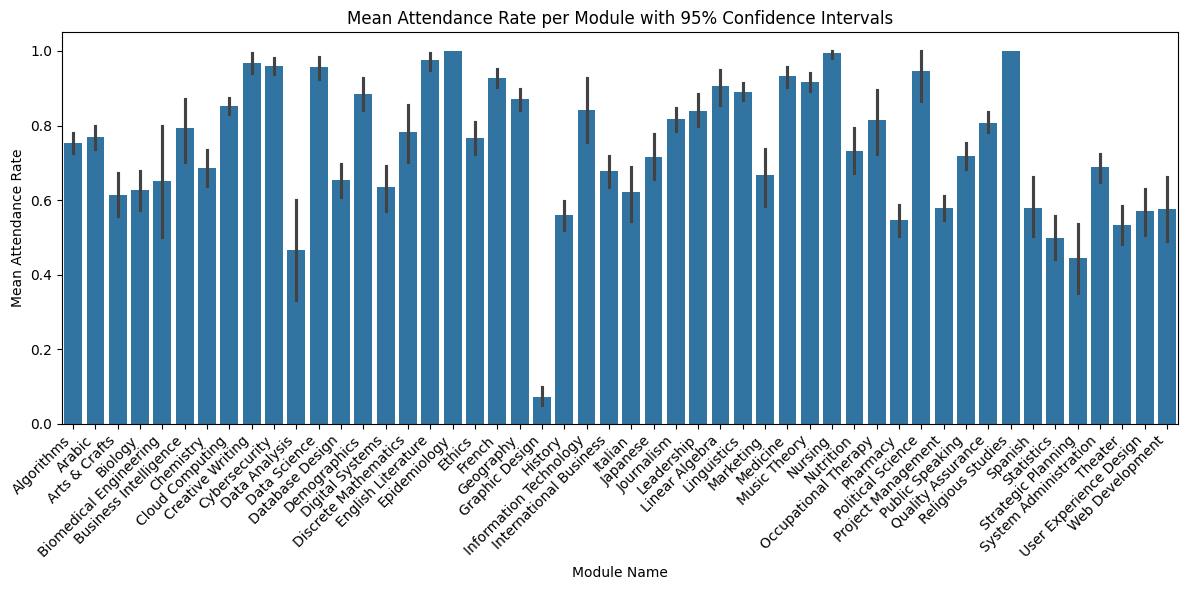

In [16]:
# Plotting Barplot of mean attendance per module with 95% confidence intervals
# Making module names ordered alphabetically for clarity
df3 = df2.sort_values('Module Name')

plt.figure(figsize=(12, 6))
sns.barplot(
            data=df3,
             x='Module Name',
             y='Attendance', 
            ci= 95, estimator='mean'
            )

plt.xticks(rotation=45, ha='right')
plt.title('Mean Attendance Rate per Module with 95% Confidence Intervals')
plt.xlabel('Module Name')
plt.ylabel('Mean Attendance Rate')
plt.tight_layout()
plt.show() 



3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show.

    

This barplot shows the mean attendance for each module, with vertical error bars representing 95% confidence intervals. Modules with longer error bars have more variation in attendance, while modules with no visible error bars either have completely consistent attendance or only a single observation in the dataset. Overall, the plot highlights clear differences in how reliably students attend different modules.

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

2. **[For L5 students only]**. Choose between a correlation analysis or a linear regression analysis to answer the question.

3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.
> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


**Exercise 5: Linking Student Attendance to Module Attendance**.

In this step, I investigate whether students with low overall attendance tend to attend modules that also have low attendance rates. To do this, I create two summary measures:

1. Module Mean Attendance
2. Mean Student Overall Attendance (i.e., the average overall attendance of students who attend that module)

These measures allow comparison between module-level attendance and student-level attendance behaviour.

## Exercise 5: Linking Student Attendance to Module Attendance

In this exercise, I investigate whether students with low overall attendance tend to attend modules that also have low attendance rates.  
To do this, I compute two summary measures for each module:

1. Mean Module Attendance: the average proportion of students who attended sessions in that module.  
2. Mean Student Overall Attendance: the average overall attendance (across all modules) of students who were enrolled in that module.

These summary measures allow me to examine how module-level attendance patterns relate to overall student attendance behaviour. I then run both a Pearson correlation analysis and a Linear regression (OLS) to answer the research question.


In [17]:
# First I will compute the mean attendance rate of each module
module_attendance = (
    df2.groupby('Module Name', as_index=False)['Attendance']
    .mean()
    .sort_values('Attendance', ascending=False)
    .rename(columns={'Attendance': 'Mean Module Attendance'})
)
# Verification
module_attendance.head()



,Module Name,Mean Module Attendance
42,Religious Studies,1.000000
17,Epidemiology,1.000000
34,Nursing,0.993333
16,English Literature,0.975000
8,Creative Writing,0.967105


In [18]:
# Now I will compute, for each module, the average overall attendance of the students who attend that module
module_student_overall = (
    df2.groupby('Module Name', as_index=False)['Student Overall Attendance']
    .mean()
    .rename(columns={'Student Overall Attendance': 'Mean Student Overall Attendance'})
)
# Verification
module_student_overall.head()

,Module Name,Mean Student Overall Attendance
0,Algorithms,0.721602
1,Arabic,0.663462
2,Arts & Crafts,0.716004
3,Biology,0.649922
4,Biomedical Engineering,0.701747


In [19]:
# Now I combine the two summaries into a single dataframe for analysis
# 1) module_attendance (mean attendance for each module)
# 2) module_student_overall (mean overall attendance of students in each module)
# This creates a single analysis table with both measures side by side
analysis_df = pd.merge(
    module_attendance,
    module_student_overall,
    on='Module Name')

# Verification
analysis_df.head()

,Module Name,Mean Module Attendance,Mean Student Overall Attendance
0,Religious Studies,1.000000,0.633774
1,Epidemiology,1.000000,0.792680
2,Nursing,0.993333,0.792680
3,English Literature,0.975000,0.938321
4,Creative Writing,0.967105,0.827519


In [20]:
# Correlation analysis between module attendance and student overall attendance using pearson correlation

r, p = pearsonr(
    analysis_df['Mean Module Attendance'],
    analysis_df['Mean Student Overall Attendance']
)

print("Correlation coefficient (r):", r)
print("p-value:", p)


Correlation coefficient (r): 0.6744686193467287
p-value: 7.86146552687514e-08


In [21]:
# Linear regression analysis using statsmodels
# First I will define the predictor (X) and outcome (Y)
X = analysis_df['Mean Module Attendance']
Y = analysis_df['Mean Student Overall Attendance']

# Statsmodels requires adding a constant to the predictor variable, so I add it manually
X = sm.add_constant(X)
# Now I will fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(Y, X).fit()
print(model.summary())


# Extract key outputs I need for the write up
print("Intercept:", model.params['const'])
print("Slope (beta):", model.params['Mean Module Attendance'])
print("p-value:", model.pvalues['Mean Module Attendance'])
print("R-squared:", model.rsquared)


                                   OLS Regression Results                                  
Dep. Variable:     Mean Student Overall Attendance   R-squared:                       0.455
Model:                                         OLS   Adj. R-squared:                  0.444
Method:                              Least Squares   F-statistic:                     40.06
Date:                             Wed, 19 Nov 2025   Prob (F-statistic):           7.86e-08
Time:                                     20:02:33   Log-Likelihood:                 48.788
No. Observations:                               50   AIC:                            -93.58
Df Residuals:                                   48   BIC:                            -89.75
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                             coef    std err          t      P>|t|      [0.025  

## Scatterplot of Module Attendance vs Student Overall Attendance

To visualise the relationship between the two variables, I create a scatterplot with:

x-axis: Mean Module Attendance  
y-axis: Mean Student Overall Attendance  

A regression line is added to help show the direction of the relationship.


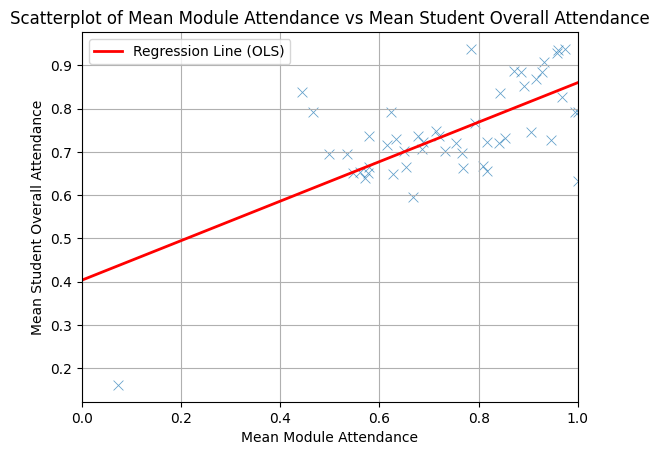

In [33]:
# Scatterplot of the two variables with the regression line

sns.scatterplot(
    x='Mean Module Attendance',
    y='Mean Student Overall Attendance',
    data=analysis_df,
    s=50,
    alpha=0.7,
    marker='x'
)

# Add regression line using OLS results 
intercept = model.params['const']
beta = model.params['Mean Module Attendance']

# Making sure the line start at x=0
plt.xlim(0, 1)   # force x-axis from 0 to 1
x_vals = np.linspace(0, 1, 100)
y_vals = intercept + beta * x_vals
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Regression Line (OLS)')


plt.title('Scatterplot of Mean Module Attendance vs Mean Student Overall Attendance')
plt.xlabel('Mean Module Attendance')
plt.ylabel('Mean Student Overall Attendance')
plt.grid(True)
plt.legend()
plt.show()


### Interpretation of the Scatterplot

The scatterplot displays the association between Mean Module Attendance (x-axis) and Mean Student Overall Attendance (y-axis). The pattern of points shows a clear linear upward trend, indicating a moderate-to-strong positive correlation between the two measures. In practical terms, modules with higher attendance rates tend to attract students who themselves have higher overall attendance across their studies.

The plotted regression line reinforces this trend: it slopes upward at a steady rate, visually confirming that the relationship is positive and approximately linear. Although the points exhibit natural variation, which is common in educational and behavioural datasets, most observations cluster around the line, suggesting that module attendance is meaningfully associated with student-level attendance habits.

### Critical Reflection

Although a scatterplot was not explicitly required, including one adds analytical depth and methodological rigour. For one it helps provide a validity check by visually confirming the linearity assumption behind both the Pearson correlation and the OLS regression is reasonable. It also provides transparency, allowing the reader to directly oversee the raw distribution of modules. It also provides outlier awareness, in that any extreme cases would be immediately visible, supporting more responsible modelling.

However, while the scatterplot provides essential visual context, it cannot quantify the exact strength or statistical significance of the relationship. Therefore, it should be interpreted as a complementary tool, not a substitute for formal statistical tests.






In [23]:
# Summary table of correlation and regression results

results_summary = pd.DataFrame({
    'Statistic': [
        'Correlation (r)',
        'Correlation p-value',
        'Regression Intercept',
        'Regression Slope (beta)',
        'Regression p-value',
        'R-squared'
    ],
    'Value': [
        r,
        p,
        model.params['const'],
        model.params['Mean Module Attendance'],
        model.pvalues['Mean Module Attendance'],
        model.rsquared  
    ]
})

results_summary

,Statistic,Value
0,Correlation (r),6.744686e-01
1,Correlation p-value,7.861466e-08
2,Regression Intercept,4.035026e-01
3,Regression Slope (beta),4.569115e-01
4,Regression p-value,7.861466e-08
5,R-squared,4.549079e-01


In [24]:
# Rounding values for better readability (normal decimal not scientific notation)
results_summary['Value'] = results_summary['Value'].round(4)
results_summary


,Statistic,Value
0,Correlation (r),0.6745
1,Correlation p-value,0.0000
2,Regression Intercept,0.4035
3,Regression Slope (beta),0.4569
4,Regression p-value,0.0000
5,R-squared,0.4549


### Summary of Statistical Results

The statistical and visual analyses provide a clear answer to the research question; students with low overall attendance do tend to attend modules with lower attendance rates. This relationship appears consitently across the numerical summaries I created and the statistical tests applied to them. The two key vairables I explored in this analysis, 'Mean Module Attendance,' (derived from 'module_attendance') and 'Mean Student Overall Attendance' (from 'module_student_overall') capture both the attendance frequency of each module and the broader engagement habits of students who take them. By merging these variables into 'analysis_df' I was able to compare these patterns directly.

The Pearson correlation coefficient (r ≈ 0.67) indicates a strong positive correlation between these two variables. This means that modules with lower attendance tend to be taken by students who also have lower attendance across all their modules. The extremely small p-value (≈ 7.86 × 10⁻⁸) confirms that this relationship is highly unlikely to be due to chance. The scatterplot provides an important complementary perspective: the points do not fall into separate clusters, nor do they scatter randomly. Instead, they follow a clear upward trend, with most values concentrated between 0.5–0.9 on both axes. There is a notable outlier in the lower-left corner representing a module with unusually low attendance taken by students with unusually low overall attendance. Without information on cohort sizes, this is difficult to interpret fully; for instance, a module with only two enrolled students could appear extremely low-attendance if those students rarely attend. A few mid-range points also sit slightly off the regression line. These deviations do not undermine the trend; they reflect natural variability in behavioural data and highlight that attendance is influenced by additional factors beyond those captured in this dataset.

Taken together, the correlation results, regression outputs, and scatterplot converge on the same interpretation: modules with stronger attendance cultures tend to be populated by more engaged students, while modules with lower attendance rates are more likely to attract students with weaker overall attendance profiles. Although the analysis would benefit from additional context—such as module size, difficulty level, or assessment type—the methods applied here provide a robust and statistically supported answer to the research question. Future work could incorporate such variables to deepen the interpretation, but given ethical considerations around student-level attributes, the current approach remains appropriate and sufficiently rigorous for the aims of this study.




✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!